<img src="logos/climbeco_course_logo.png" width="1000" align="left"/>

<br>
<br>
<br>
<br>
<br>

#  Exercise 5: _Estimating national budgets_
<br>
This exercise package is focusing on how to use land masks on modelling results (i.e. vegetation modelling, inverse modelling) to estimate national budgets. You will use modelling results with different resolutions together with land masks of different resolution and/or country coverage (i.e. incl. Exclusive Economic Zones - EEZ or not incl. EEZ).

<font color='blue'>INPUT DATA</font>

- EDGAR annual total emissions (in 0.1 and 0.5 deg resolutions) --- > anthropogenic emissions
- LUMIA output (0.5 deg resolution) --- > biospheric fluxes (annual totals need to be computed)
- Country masks

    - EEZ (0.1 deg grid resolution)
    - EEZ (0.5 deg grid resolution)
    - No EEZ (0.1 deg grid resolution)
    - No EEZ (0.5 deg grid resolution)

**Tasks:**
1. Interactive map presenting country masks (EEZ & No EEZ) in different resolutions (0.1 degree or 0.5 degree).
2. Select 2 countries (e.g. "Sweden" and "Switzerland", one country with coastal borders and one without). Create a plot comparing EDGAR-data with different combinations of country masks (i.e. EEZ or No EEZ) and EDGAR grid-resolutions (0.1 deg or 0.5 deg) for every country. Do you see any differences?
3. Create a plot showing the differences in estimated national budgets for 2 countries with EDGAR-data and LUMIA-data of 0.5 deg grid resolution with and without EEZ country masks.

## Task 1:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Task 2:
<table><tr><td width='300'>
<p>Calculate the emission for two countries and create a plot to compare the results.
For each country you should use two grid resolutions (0.1 and 0.5) and two "masks", 
the EEZ (Exclusive Economic Zone) and the territorial waters one. Below are two cells, in the first one you should make the calculations. If you keep the variable names, the second cell will produce a plot to compare the two countries.</p></td><td><img src="images/day3/excercise2.png"></td></tr></table>

More infos about marine regions, borders etc: [marine regions, interactive map](http://www.marineregions.org/eezsearch.php) , [wiki: exclusive economic zone](https://en.wikipedia.org/wiki/Exclusive_economic_zone)
    


In [6]:
# read EDGAR anthropogenic emissions on 0.5 degree x 0.5 degree grid
lon_edgar_05, lat_edgar_05, emis_edgar_05, edgar_units_05 = read_edgar(path_edgar,0.5)
xx_edgar_05,yy_edgar_05 = get_mesh(lon_edgar_05,lat_edgar_05)

# read EDGAR anthropogenic emissions on 0.1 degree x 0.1 degree grid
lon_edgar_01, lat_edgar_01, emis_edgar_01, edgar_units_01 = read_edgar(path_edgar,0.1)
xx_edgar_01,yy_edgar_01 = get_mesh(lon_edgar_01,lat_edgar_01)


NameError: name 'read_edgar' is not defined

In [2]:
# this part (cell) you need to compute the "real" data
# and adjust the names and labels
# Keep the variable names or adjust the plot function below

countries = ['country 1', 'country 2']
grid_resolution=['Grid 0.1','Grid 0.5']
country_mask = ['No EEZ','EEZ']

ylabel_1 = 'unit of emission'

# edgar emissions country_grid[No EEZ , EEZ]
country0_edgar_grid1 = np.array([7.5,9])
country0_edgar_grid2 = np.array([6.9,8])

country1_edgar_grid1 = np.array([2.5,5])
country1_edgar_grid2 = np.array([5,7.7])

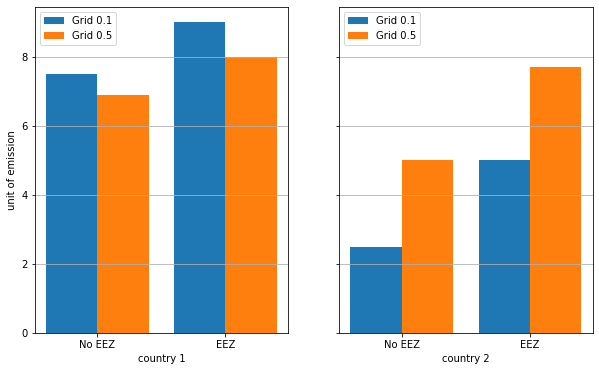

In [3]:
# compare edgar country masks for different grid resolution
# if you kept the variable names you don't need to change
#anything in this cell. just execute to create the plot
#-----------------------------------------------------------
# create plot
fig1,(ax1,ax2) = plt.subplots(1,2,sharey=True)
fig1.set_size_inches(10,6)
x = np.arange(len(grid_resolution))
barwidth = 0.4
# create the "left" subplot and add edgar numbers
# to compare grid and country mask
ax1.bar(x-barwidth/2,country0_edgar_grid1,barwidth, label=grid_resolution[0])
ax1.bar(x+barwidth/2,country0_edgar_grid2,barwidth, label=grid_resolution[1])

# add annotation
ax1.set_xticks(x)
ax1.set_xticklabels(country_mask)
ax1.grid(axis='y')
ax1.legend(loc='upper left')
ax1.set_xlabel(countries[0])
ax1.set_ylabel(ylabel_1)

# the next country..
ax2.bar(x-barwidth/2,country1_edgar_grid1,barwidth, label=grid_resolution[0])
ax2.bar(x+barwidth/2,country1_edgar_grid2,barwidth, label=grid_resolution[1])

# add annotation
ax2.set_xticks(x)
ax2.set_xticklabels(country_mask)
ax2.grid(axis='y')
ax2.legend(loc='upper left')
ax2.set_xlabel(countries[1])

plt.show()

## Task 3
We will reuse the emission from above, but now we will add the "lumia" biosphere emmision, to discuss the the ratio of antropogenic and biosphere emission, and impact of country mask selection. The goald here is to create a plot for two countries, show "edgar" "lumia" and and the corresponding total amount of emission for each country and mask (NoEEZ, EEZ). We do have only 0.5 grid values for Lumia, so we do not compare the impact of grid resolution this time.


In [4]:
# For Lumia, we only have value for gridresolution 0.5
# create an two array's (one for each country) containing
# the emission for mask1 (NoEEZ) and mask2 (EEZ)
# country0_lumia = np.array([val for mask1, val for mask2])
country0_lumia = np.array([-0.55,2.1])
country1_lumia = np.array([-1.15, -4.1])

# country total emission
# sum the antropogenic and fossil fuel emmision
country0_total = country0_edgar_grid2 + country0_lumia
country1_total = country1_edgar_grid2 + country1_lumia

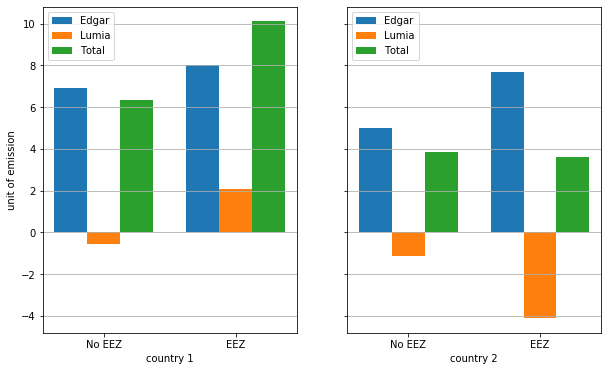

In [5]:
#-----------------------------------------------------------
# compare edgar country masks for different grid resolution
#-----------------------------------------------------------
# create plot
fig2,(ax1,ax2) = plt.subplots(1,2,sharey=True)
fig2.set_size_inches(10,6)
x = np.arange(len(grid_resolution))
barwidth = 0.25

# add lumia
ax1.bar(x-barwidth,country0_edgar_grid2,barwidth, label="Edgar")
ax1.bar(x, country0_lumia,barwidth, label="Lumia")
ax1.bar(x+barwidth,country0_total,barwidth, label='Total')

# add annotation
ax1.set_xticks(x)
ax1.set_xticklabels(country_mask)
ax1.grid(axis='y')
ax1.legend(loc='upper left')
ax1.set_xlabel(countries[0])
ax1.set_ylabel(ylabel_1)

# add lumia
ax2.bar(x-barwidth,country1_edgar_grid2,barwidth, label="Edgar")
ax2.bar(x, country1_lumia,barwidth, label="Lumia")
ax2.bar(x+barwidth,country1_total,barwidth, label='Total')

# add annotation
ax2.set_xticks(x)
ax2.set_xticklabels(country_mask)
ax2.grid(axis='y')
ax2.legend(loc='upper left')
ax2.set_xlabel(countries[1])

plt.show()
#-----------------------------------------------------

<br>
<br>
<br>
<br>
<img src="logos/climbeco_contributors_logo.png" width="1000" align="left"/>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>